In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
# Load the dataset
df = pd.read_csv('/kaggle/input/dvw-dataset/DVW_project.csv')

# Display the first few rows of the dataset
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Object,Star,Star type,Mass (M⊕),Radius (R⊕),Density (g/cm3),Flux (F⊕),Teq (K),Period (days),Distance (ly),Note,index,Discovery Year,Discovery Method
0,Earth (reported for reference),Sun,G2V,1.00,1.00,5.51,1.00,255.00,365.25,0.0,Only planet confirmed to support life.,NaN,0,NaN
1,Venus (reported for reference),Sun,G2V,0.81,0.95,5.24,1.91,244.26,224.70,4.2,[5],NaN,0,NaN
2,Mars (reported for reference),Sun,G2V,0.11,0.53,3.93,0.43,209.80,686.98,5.8,[6],NaN,0,NaN
3,Gliese 12 b,Gliese 12,M4V,0.88,1.03,4.44,1.60,315.00,12.70,40.0,[7],NaN,0,NaN
4,Gliese 163 c,Gliese 163,M3V,6.80,NaN,NaN,1.25,277.00,25.60,49.0,[1],NaN,0,NaN


In [29]:
print("Shape of the dataset:", df.shape)

print("Missing values in each column:")
print(df.isnull().sum())

df.describe()

Shape of the dataset: (622, 14)
Missing values in each column:
Object                0
Star                556
Star type           556
Mass (M⊕)            19
Radius (R⊕)          14
Density (g/cm3)     613
Flux (F⊕)           559
Teq (K)             567
Period (days)       556
Distance (ly)         8
Note                557
index                74
Discovery Year        0
Discovery Method     74
dtype: int64


,Mass (M⊕),Radius (R⊕),Density (g/cm3),Flux (F⊕),Teq (K),Period (days),Distance (ly),index,Discovery Year
count,603.000000,608.000000,9.000000,63.000000,55.000000,66.000000,614.000000,548.000000,622.000000
mean,419.697579,8.255477,4.616667,0.896190,242.564727,89.614848,1107.140977,9751.255474,1777.654341
std,1052.395623,6.888127,0.988964,0.414322,30.039297,129.715957,1278.543789,6959.751952,653.783763
min,0.070000,0.530000,3.300000,0.250000,182.000000,4.050000,0.000000,103.000000,0.000000
25%,7.870000,2.267500,3.930000,0.580000,220.500000,17.750000,259.480000,5656.250000,2011.250000
50%,75.960000,7.195000,4.440000,0.880000,247.000000,36.800000,696.440000,8493.500000,2018.000000
75%,328.950000,13.305000,5.510000,1.260000,267.500000,119.875000,1389.395000,11079.500000,2022.000000
max,9852.730000,77.340000,5.900000,1.910000,315.000000,686.980000,8155.700000,37920.000000,2025.000000


In [30]:
# Fill missing values in 'Mass (M⊕)' and 'Radius (R⊕)' with their medians
df['Mass (M⊕)'] = df['Mass (M⊕)'].fillna(df['Mass (M⊕)'].median())
df['Radius (R⊕)'] = df['Radius (R⊕)'].fillna(df['Radius (R⊕)'].median())

# Drop rows with missing values in 'Density (g/cm3)' since there are too few non-missing values
df = df.dropna(subset=['Density (g/cm3)'])

## 1. Distribution of Key Numerical Features

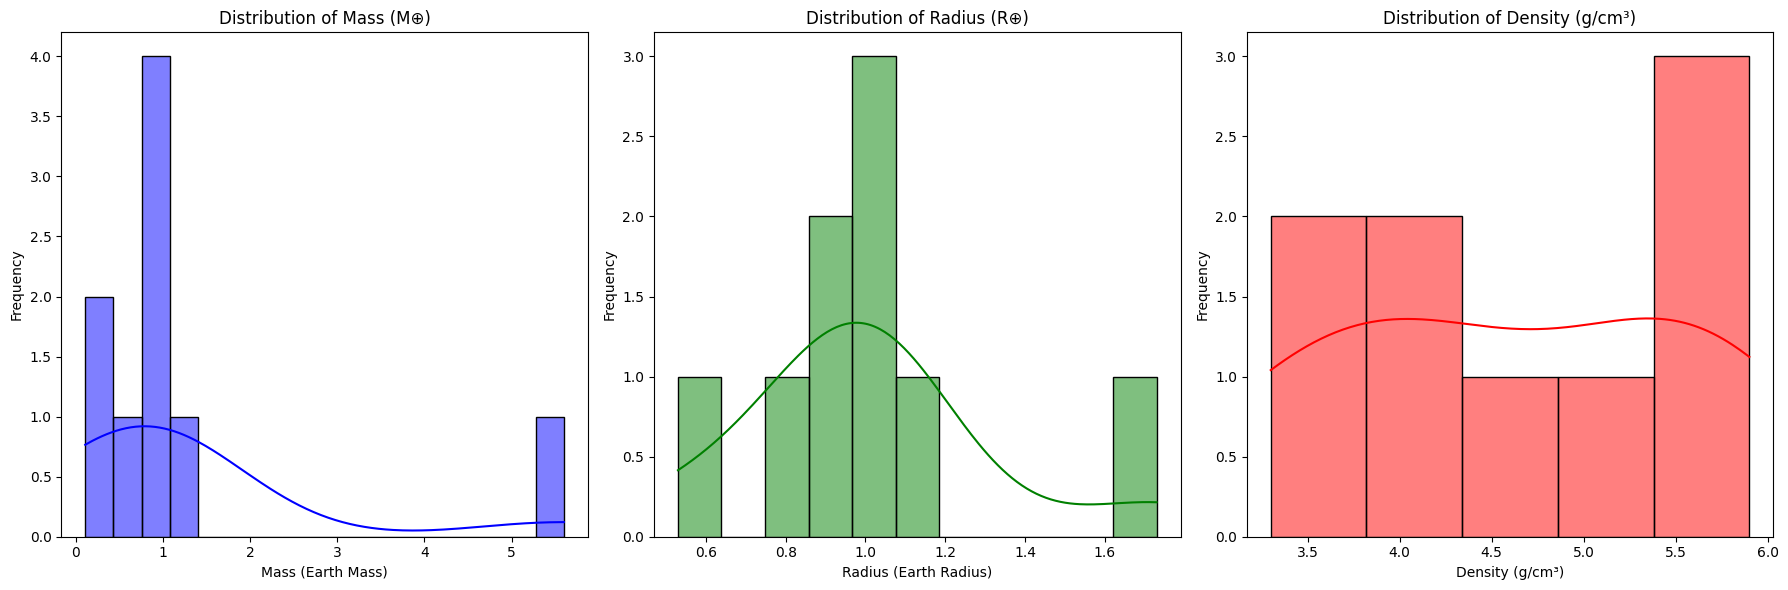

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Mass distribution
sns.histplot(df['Mass (M⊕)'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Mass (M⊕)')
axes[0].set_xlabel('Mass (Earth Mass)')
axes[0].set_ylabel('Frequency')

# Radius distribution
sns.histplot(df['Radius (R⊕)'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Radius (R⊕)')
axes[1].set_xlabel('Radius (Earth Radius)')
axes[1].set_ylabel('Frequency')

# Density distribution
sns.histplot(df['Density (g/cm3)'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Density (g/cm³)')
axes[2].set_xlabel('Density (g/cm³)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.Relationship Between Mass and Radius

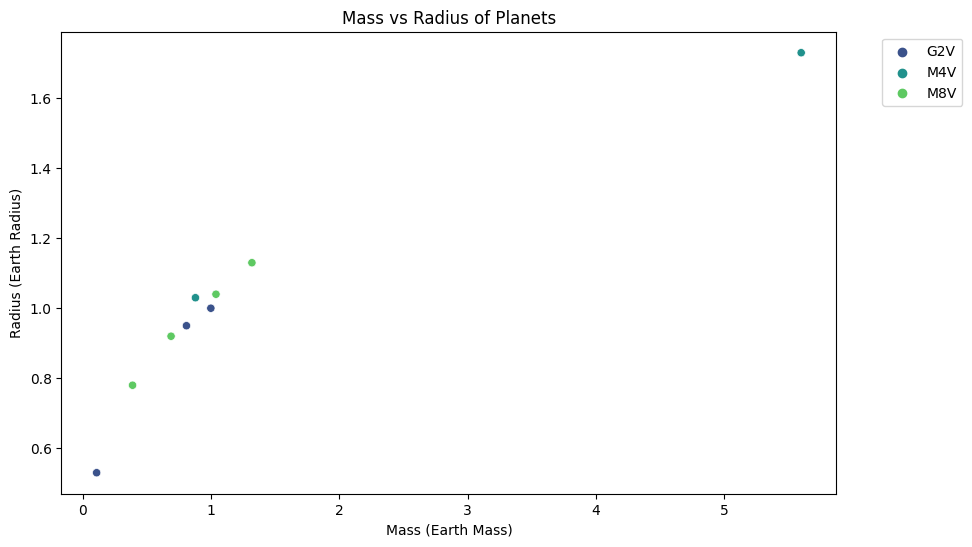

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mass (M⊕)', y='Radius (R⊕)', data=df, hue='Star type', palette='viridis')
plt.title('Mass vs Radius of Planets')
plt.xlabel('Mass (Earth Mass)')
plt.ylabel('Radius (Earth Radius)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 3.Discovery Year Analysis

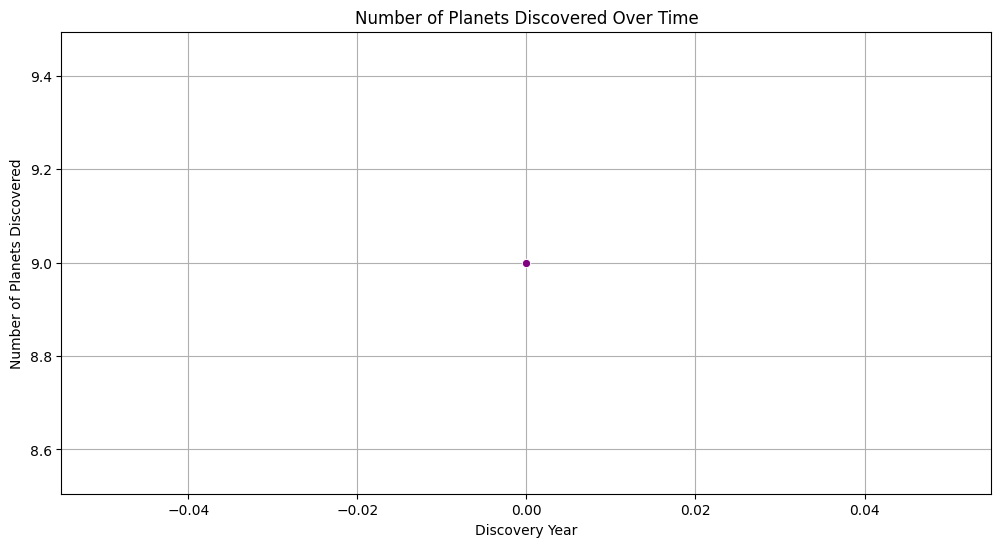

In [33]:
# The number of planets discovered each year
discovery_year_counts = df['Discovery Year'].value_counts().sort_index()

#the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=discovery_year_counts.index, y=discovery_year_counts.values, marker='o', color='purple')
plt.title('Number of Planets Discovered Over Time')
plt.xlabel('Discovery Year')
plt.ylabel('Number of Planets Discovered')
plt.grid(True)
plt.show()

## 4. Correlation Heatmap

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


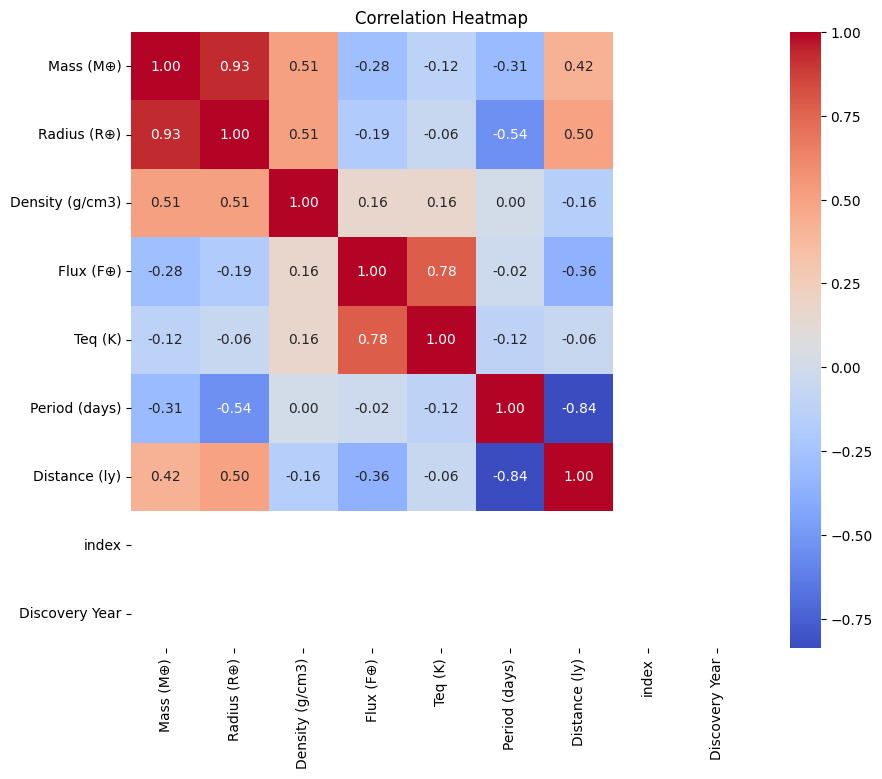

In [34]:
numerical_df = df.select_dtypes(include=[np.number])

# the correlation matrix
corr = numerical_df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()